In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","ip_address","result"]

In [3]:
len(colnames)

43

In [4]:
df = pd.read_csv("dataSet.csv",header=None,names=colnames)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,ip_address,result
0,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1.0.0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1.0.0.1,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1.0.0.2,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1.0.0.3,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1.0.0.4,snmpgetattack.


In [6]:
df.shape

(311029, 43)

In [7]:
icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]


In [8]:
icmp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,ip_address,result
82,0,icmp,eco_i,SF,30,0,0,0,0,0,...,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1.208.0.0,normal.
156,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,2.57.12.0,normal.
406,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,5.8.248.0,normal.
629,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,5.54.0.0,normal.
767,0,icmp,eco_i,SF,30,0,0,0,0,0,...,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,5.101.72.0,normal.


In [9]:
features = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count","result"]
target = "result"

In [10]:
icmp_df = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]

In [11]:
classes = np.unique(y)
print(classes)

['ipsweep.' 'multihop.' 'normal.' 'pod.' 'saint.' 'satan.' 'smurf.'
 'snmpguess.']


In [12]:
z = icmp_df[icmp_df.loc[:,"result"] == "ipsweep."]
print(z)

        duration  src_bytes  wrong_fragment  count  urgent  num_compromised  \
8075           0         18               0      1       0                0   
8085           0         18               0      1       0                0   
8109           0         18               0      1       0                0   
8115           0         18               0      1       0                0   
8119           0         18               0      1       0                0   
...          ...        ...             ...    ...     ...              ...   
140227         0          8               0      1       0                0   
140228         0          8               0      1       0                0   
140229         0          8               0      1       0                0   
140230         0          8               0      1       0                0   
140231         0          8               0      1       0                0   

        srv_count    result  
8075            1  ip

In [13]:
for i in range(len(classes)):
    if i == 2 :
        icmp_df = icmp_df.replace(classes[i], 0)
    else:
        icmp_df = icmp_df.replace(classes[i], 1)


icmp_df=icmp_df.replace("eco_i",-0.1)
icmp_df=icmp_df.replace("ecr_i",0.0)
icmp_df=icmp_df.replace("tim_i",0.1)
icmp_df=icmp_df.replace("urp_i",0.2)

In [14]:
y = icmp_df.loc[:,target]

In [15]:
X = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [19]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","DecisionTree"]
scores = []

In [20]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of  model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of  model is:  99.99797943060355
Confusion Matrix:
 [[  106     0]
 [    1 49384]]
Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       1.00      1.00      1.00     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============
Accuracy of  model is:  99.99797943060355
Confusion Matrix:
 [[  106     0]
 [    1 49384]]
Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       1.00      1.00      1.00     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============
Accuracy of  model is:  99.92725950172758
Confusion Matrix:
 [[  105     1]


In [21]:
scores=scores[:4]
scores

[99.99797943060355, 99.99797943060355, 99.92725950172758, 100.0]

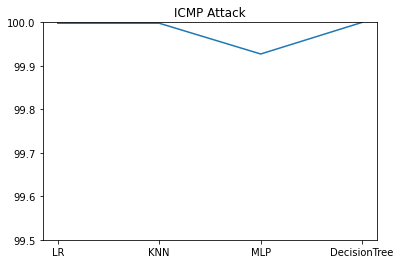

In [22]:
plt.plot(classifiers,scores)
plt.title("ICMP Attack")
plt.ylim(99.5,100)
plt.show()